# RSDE example

**Code Illustration that leads to Figure1.3**

citation: ??

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import RSDE_data_analysis as RSDE

In [4]:
#locate RSDE data and use data class in RSDE file
file_path = 'RSDE_table1314data.csv'
RSDE_data = RSDE.DataProcessor(file_path)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


**Visualise data**

In [5]:
RSDE_data.data

,Name,QL (Quantification limit),INF Max concentration - 100,INF Concentration - 95,INF Concentration - 90,INF Concentration - 75,INF Median concentration - 50,EFF Max concentration - 100,EFF Concentration - 95,EFF Concentration - 90,EFF Concentration - 75,EFF Median concentration - 50
0,Zinc,5.0,815.8,332.7,270.7,213.4,154.2,295.0,86.5,70.1,55.0,38.5
1,Cuivre,5.0,383.0,128.7,104.6,79.1,52.1,347.5,15.8,9.5,5.2,5.0
2,AMPA,0.1,34.7,6.7,4.8,2.8,1.8,27.6,9.5,7.1,4.3,2.4
3,Chrome total,5.0,199.3,21.7,12.4,8.1,5.0,98.6,8.5,6.9,5.0,5.0
4,Nickel,5.0,90.7,15.5,10.5,6.5,5.0,70.3,8.2,6.0,5.0,5.0
5,Plomb,2.0,167.2,18.8,14.0,8.5,5.5,16.4,2.6,2.0,2.0,2.0
6,Glyphosate,0.1,23.8,3.9,2.4,1.5,0.9,11.4,2.2,1.6,0.9,0.5
7,DEHP,1.0,273.1,59.0,43.7,24.1,10.7,14.6,1.9,1.3,1.0,1.0
8,Chloroforme,1.0,61.1,4.0,3.0,1.9,1.1,40.6,1.3,1.0,1.0,1.0
9,Toluene,1.0,123.0,8.7,6.0,2.7,1.3,21.7,1.0,1.0,1.0,1.0


**Visualised Influent (INF) dataframe**

N.B. the efflunet dataframe is of identical nature.

In [8]:
RSDE_data.INF

,Name,QL (Quantification limit),INF Max concentration - 100,INF Concentration - 95,INF Concentration - 90,INF Concentration - 75,INF Median concentration - 50
0,Zinc,5.0,815.8,332.7,270.7,213.4,154.2
1,Cuivre,5.0,383.0,128.7,104.6,79.1,52.1
2,AMPA,0.1,34.7,6.7,4.8,2.8,1.8
3,Chrome total,5.0,199.3,21.7,12.4,8.1,5.0
4,Nickel,5.0,90.7,15.5,10.5,6.5,5.0
5,Plomb,2.0,167.2,18.8,14.0,8.5,5.5
6,Glyphosate,0.1,23.8,3.9,2.4,1.5,0.9
7,DEHP,1.0,273.1,59.0,43.7,24.1,10.7
8,Chloroforme,1.0,61.1,4.0,3.0,1.9,1.1
9,Toluene,1.0,123.0,8.7,6.0,2.7,1.3


## Extract relevant data

From the above data, we are interested in INF Max concentration (100) and INF Concentration (95) - columns [2,3]

In [9]:
#Define dataframe for INF (influent) and EFF (effluent)
#Use RSDE function df_substance transpose
df_INF = RSDE_data.df_substance_transpose(col_ind = [2,3])
df_EFF = RSDE_data.df_substance_transpose(INF = False,col_ind = [2,3])

**Visualised df_INF**

In [11]:
#Individual values are absolute concentration / median concentration
df_INF

Name,Zinc,Cuivre,AMPA,Chrome total,Nickel,Plomb,Glyphosate,DEHP,Chloroforme,Toluene
INF Max concentration - 100,5.290532,7.351248,19.277778,39.86,18.14,30.400000,26.444444,25.523364,55.545455,94.615385
INF Concentration - 95,2.157588,2.470250,3.722222,4.34,3.10,3.418182,4.333333,5.514019,3.636364,6.692308


### Create grouped df

Concatenate df_INF and df_EFF (add a dummy column between for visualisation)

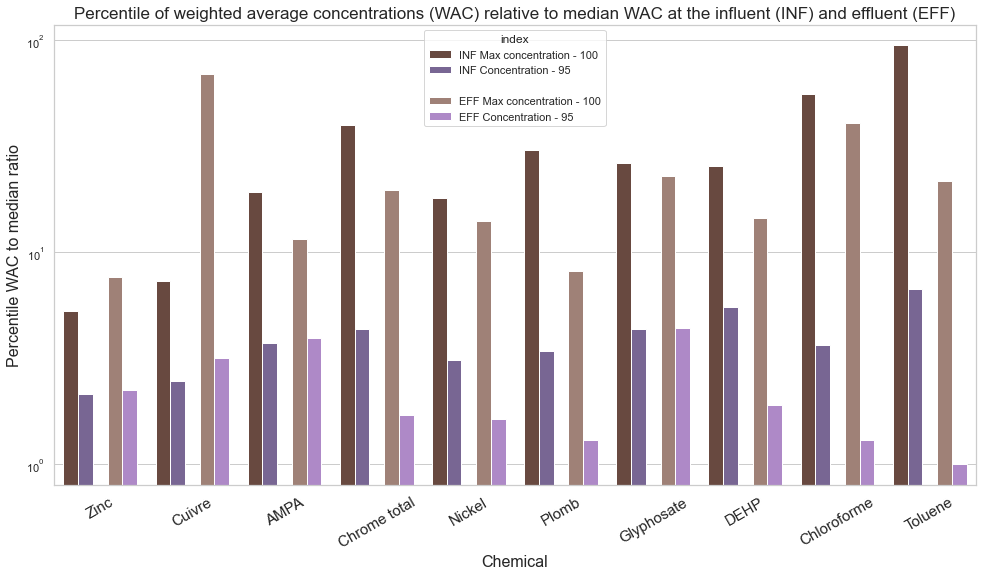

In [13]:
#dummy separation between influent and effluent
df_dummy = pd.DataFrame(data = np.zeros((1,df_INF.shape[1])),columns = df_INF.columns,index = [' '])
df_INF_EFF = pd.concat([df_INF,df_dummy,df_EFF])
RSDE.plot_groupedbarplot(df_INF_EFF)